##### Copyright 2024 Google LLC.

In [30]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Introduction to Gemini 2.0 Flash Thinking

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/gemini-2/thinking.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

[Gemini 2.0 Flash Thinking](https://ai.google.dev/gemini-api/docs/thinking-mode), is an experimental model that explicitly showcases its thoughts. Built on the speed and performance of Gemini 2.0 Flash, this model is trained to use thoughts in a way that leads to stronger reasoning capabilities.

You'll see examples of those reasoning capabilities with [code understanding](#scrollTo=GAa7sCD7tuMW), [geometry](#scrollTo=ADiJV-fFyjRe) and [math](#scrollTo=EXPPWpt6ttJZ) problems and for [generating questions](#scrollTo=dtBDPf4kAyG1) adapted to a specific level of knowledge.

As you will see, the model is exposing its thoughts so you can have a look at its reasoning and how it did reach its conclusions.

## 0/ Setup

This section install the SDK, set it up using your [API key](../quickstarts/Authentication.ipynb), imports the relevant libs, downloads the sample videos and upload them to Gemini.

Just collapse (click on the little arrow on the left of the title) and run this section if you want to jump straight to the examples (just don't forget to run it otherwise nothing will work).

### Install SDK

The new **[Google Gen AI SDK](https://ai.google.dev/gemini-api/docs/sdks)** provides programmatic access to Gemini 2.0 (and previous models) using both the [Google AI for Developers](https://ai.google.dev/gemini-api/docs) and [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview) APIs. With a few exceptions, code that runs on one platform will run on both. This means that you can prototype an application using the Developer API and then migrate the application to Vertex AI without rewriting your code.

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks) or in the [Getting started](../gemini-2/get_started.ipynb) notebook.

In [31]:
!pip install -U -q "google-genai>=0.3.0"

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [32]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://link_to_vertex_AI)). The model is now set in each call.

In [33]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Check the "thinking" model info

The [Gemini 2.0 Flash Thinking](https://ai.google.dev/gemini-api/docs/thinking-mode) model is optimized for complex tasks that need multiple rounds of strategyzing and iteratively solving.

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.


In [34]:
from pprint import pprint
pprint(client.models.get(model="gemini-2.0-flash-thinking-exp").model_dump(exclude_defaults=True))

{'description': 'Gemini 2.0 Flash Thinking Experimental',
 'display_name': 'Gemini 2.0 Flash Thinking Experimental',
 'input_token_limit': 32767,
 'name': 'models/gemini-2.0-flash-thinking-exp',
 'output_token_limit': 8192,
 'supported_actions': ['generateContent', 'countTokens'],
 'tuned_model_info': {},
 'version': '2.0'}


### Imports

In [35]:
import json
from PIL import Image
from IPython.display import display, Markdown

# 1/ Examples

Here are some quite complex examples of what Gemini 2.0 thinking model can solve.

In each of them you can select different models to see how this new model compares to its predecesors.

In some cases, you'll still get the good answer from the other models, in that case, re-run it a couple of times and you'll see that Gemini 2.0 thinking is more consistent thanks to its thinking step.

## Example #1: code simplification

First, try with a simple code comprehension and simplification example.

In [36]:
response = client.models.generate_content(
    model="gemini-2.0-flash-thinking-exp",
    contents='How can I simplify this? `(Math.round(radius/pixelsPerMile * 10) / 10).toFixed(1);`'
)

pprint(response.candidates[0].content)

Content(parts=[Part(video_metadata=None, thought=None, code_execution_result=None, executable_code=None, file_data=None, function_call=None, function_response=None, inline_data=None, text="Let's break down the thought process for simplifying that JavaScript expression.\n\n**1. Understanding the Goal:**\n\nThe primary goal is to simplify the expression `(Math.round(radius/pixelsPerMile * 10) / 10).toFixed(1)` while maintaining its functionality. This means it should still perform the following steps:\n\n* Divide `radius` by `pixelsPerMile`.\n* Multiply the result by 10.\n* Round the multiplied result to the nearest integer.\n* Divide the rounded result by 10.\n* Format the final result as a string with one decimal place.\n\n**2. Identifying Redundancy/Inefficiency:**\n\nThe core inefficiency lies in performing separate rounding and division by 10. Multiplying by 10 and then dividing by 10 effectively shifts the decimal point one place to the right and then back to the left. This is a co

As you can see, your response has multiple parts. While you could use `response.text` to get all of it right away as usual it's actually more interesting to check each of them separately when using the thinking model.

The first part is the "inner thoughts" of the model, that where it analyzes the problem and comes up with its strategy:

In [37]:
# First part is the inner thoughts of the model
Markdown(response.candidates[0].content.parts[0].text)

Let's break down the thought process for simplifying that JavaScript expression.

**1. Understanding the Goal:**

The primary goal is to simplify the expression `(Math.round(radius/pixelsPerMile * 10) / 10).toFixed(1)` while maintaining its functionality. This means it should still perform the following steps:

* Divide `radius` by `pixelsPerMile`.
* Multiply the result by 10.
* Round the multiplied result to the nearest integer.
* Divide the rounded result by 10.
* Format the final result as a string with one decimal place.

**2. Identifying Redundancy/Inefficiency:**

The core inefficiency lies in performing separate rounding and division by 10. Multiplying by 10 and then dividing by 10 effectively shifts the decimal point one place to the right and then back to the left. This is a common pattern when aiming for rounding to a specific decimal place.

**3. Targeting the Rounding Logic:**

The part of the expression responsible for the core rounding to one decimal place is `Math.round(value * 10) / 10`. This can be replaced with a more direct rounding method.

**4. Exploring Alternatives to `Math.round()` for Decimal Precision:**

The standard JavaScript `Math` object doesn't have a built-in function to round to a specific number of decimal places directly. However, there are common techniques:

* **String Manipulation:** Convert to a string, find the decimal point, and truncate/round. This is generally less efficient for numerical operations.
* **Multiplication and Division (the original approach):** This is what the original expression does.
* **Using `toFixed()` Earlier:** The `.toFixed(1)` is already at the end, but we can leverage it earlier if we can round to the correct integer *before* applying `toFixed()`.

**5. Focusing on `toFixed()`'s Behavior:**

`toFixed(n)` rounds the number to `n` decimal places. This means if we can get the value *before* `toFixed()` to be the desired rounded value (multiplied by 10), `toFixed(1)` will handle the final formatting.

**6. Trial-and-Error with Multiplication:**

Consider the core calculation `radius / pixelsPerMile`. We want to round this to one decimal place.

* **Incorrect Approach (initial thought):**  `Math.round(radius / pixelsPerMile)` – This rounds to the nearest whole number, not what we need.

* **The Key Insight:** To round to *one* decimal place, we need to effectively round the number *multiplied by 10*. This is precisely what the original expression does before dividing back down.

**7. Combining with `toFixed()`:**

If we perform the multiplication by 10 before `toFixed()`, the rounding within `toFixed()` will take care of the rest.

* **Attempt 1:** `(radius / pixelsPerMile * 10).toFixed(1)`  --  This *almost* works, but `toFixed()` rounds *after* the multiplication by 10. We need to round to the nearest *integer* at the stage where the decimal point is shifted.

* **Correct Approach:**  We still need `Math.round()` *before* `toFixed()`, but we can apply it to the value *before* the final division by 10:  `Math.round(radius / pixelsPerMile * 10).toFixed(1)`

**8. Recognizing Further Simplification (Removing Redundant Division):**

Now, look at the expression `Math.round(radius / pixelsPerMile * 10)`. This is exactly the numerator of the original expression *before* the division by 10. Since `toFixed(1)` handles the rounding to one decimal place *and* converts to a string, we don't need the explicit division by 10 anymore.

**9. Arriving at the Simplest Version:**

This leads to the most concise and efficient solution: `(radius / pixelsPerMile).toFixed(1)`

**10. Considering Edge Cases and Alternatives (Self-Correction):**

* **Floating-Point Precision:**  It's important to be aware that floating-point arithmetic can sometimes introduce small inaccuracies. For most practical purposes, the simplified version is sufficient. However, in highly critical financial applications, more robust decimal libraries might be considered.

* **Alternative Rounding Methods:** While `toFixed()` is the most direct for this case, one could technically use custom functions or libraries for more fine-grained control over rounding behavior (e.g., rounding up, rounding down, rounding to even). However, for the given requirement, `toFixed()` is ideal.

This detailed breakdown shows the thought process of identifying the core functionality, spotting redundancy, exploring alternative techniques, and progressively refining the expression to its simplest and most efficient form. It involves some trial-and-error and understanding the behavior of the JavaScript number and math functions.

Most of the time you won't need to checks the thoughts as you'll be mostly interested in the answer, but having access to them gives you a way to check where the answers comes from and how the model came up with it. It's not a black box anymore!

If you are using the `v1alpha` API, you'll see a `thought=True`, indicating that the first part is indeed thoughts.

Then the second part is the actual answer:

In [38]:
# Second part is the response from the model
Markdown(response.candidates[0].content.parts[1].text)

You're looking to round a calculated value to one decimal place. Let's break down the original expression and explore simplifications.

**Understanding the Original Expression:**

1. **`radius / pixelsPerMile`**:  This performs the initial calculation. Let's call the result of this `intermediateValue`.
2. **`intermediateValue * 10`**: This multiplies the result by 10, effectively shifting the decimal point one place to the right.
3. **`Math.round(...)`**: This rounds the shifted value to the nearest integer.
4. **`/ 10`**: This divides the rounded integer by 10, shifting the decimal point back to its original position, effectively rounding the original `intermediateValue` to one decimal place.
5. **`.toFixed(1)`**: This converts the number to a string and formats it to have exactly one decimal place.

**Simplifications:**

The core of the operation is rounding to one decimal place. JavaScript offers a more direct way to achieve this.

**Option 1: Using `toFixed()` Directly (Most Common and Recommended)**

You can apply `toFixed(1)` directly to the result of the division:

```javascript
(radius / pixelsPerMile).toFixed(1);
```

**Explanation:**

* `radius / pixelsPerMile` is calculated as before.
* `.toFixed(1)` then takes this result and:
    * Rounds it to one decimal place.
    * Converts it to a string.

**Why this is better:**

* **More concise and readable:** It directly expresses the intent of rounding to one decimal place.
* **Potentially more efficient:**  Avoids the intermediate multiplication, rounding to an integer, and then division.

**Option 2:  Using `Math.round()` with a slightly different approach (Less common but illustrates the point)**

You could also achieve the same result using `Math.round()` with a slight modification:

```javascript
(Math.round((radius / pixelsPerMile) * 10) / 10).toFixed(1);
```

**While this looks very similar to the original, the parentheses are crucial.** They ensure that the multiplication by 10 happens *before* the `toFixed(1)` is applied.

**However, this option is still less direct than Option 1 and doesn't offer any significant advantage.**

**Why the original expression works (and why it's redundant):**

The original expression works because the `Math.round(value * 10) / 10` pattern is a common technique for rounding to one decimal place *when you don't have `toFixed()` readily available or want more control over the rounding behavior*. However, `toFixed()` is specifically designed for this purpose and simplifies the code.

**Which option to choose:**

**For clarity, conciseness, and likely better performance, the recommended approach is Option 1:**

```javascript
(radius / pixelsPerMile).toFixed(1);
```

This directly expresses the intent and leverages the built-in functionality of `toFixed()`.


As a comparison here's what you'd get with the "classic" [Gemini 2.0](https://ai.google.dev/gemini-api/docs/models/gemini-v2) model.

Unlike thinking mode, the normal model does not articulates its thoughts and tries to answer right away which can lead to more simpler answers to complex problems.

In [ ]:
response = client.models.generate_content(
    model="gemini-2.0-flash-exp",
    contents='How can I simplify this? `(Math.round(radius/pixelsPerMile * 10) / 10).toFixed(1);`'
)

Markdown(response.text)

## Example #2: Geometry problem (with image)

This geometry problem requires complex reasoning and is also using Gemini multimodal abilities to read the image.

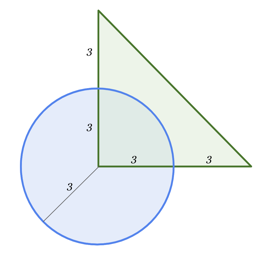

In [40]:
!wget https://storage.googleapis.com/generativeai-downloads/images/geometry.png -O geometry.png -q

im = Image.open("geometry.png").resize((256,256))
im

In [41]:
model_name = "gemini-2.0-flash-thinking-exp" # @param ["gemini-1.5-flash-8b","gemini-1.5-flash","gemini-1.5-pro","gemini-2.0-flash-exp", "gemini-2.0-flash-thinking-exp"] {"allow-input":true}

response = client.models.generate_content(
    model=model_name,
    contents=[
        im,
        "What's the area of the overlapping region?"
    ]
)

display(Markdown("## Thoughts"))
display(Markdown(response.candidates[0].content.parts[0].text))
display(Markdown("## Answer"))
display(Markdown(response.candidates[0].content.parts[1].text))

### Thoughts

Let's break this down. The overlapping region is formed by a quarter of a circle and a triangle.

The circle has a radius of 3. The area of the entire circle is $\pi r^2 = \pi (3)^2 = 9\pi$.
The overlapping region involves a quarter of this circle, so the area of the quarter circle is $(1/4) \times 9\pi = \frac{9}{4}\pi$.

The triangle is a right-angled triangle. The base and height of the triangle are both 3. The area of the triangle is $(1/2) \times \text{base} \times \text{height} = (1/2) \times 3 \times 3 = \frac{9}{2}$.

Looking at the image again, the overlapping region is not the sum of a quarter circle and a triangle. The overlapping region is formed by the intersection of the circle and the triangle.

The shape of the overlapping region looks like a sector of the circle minus a triangle.

The circle has a radius of 3. The lines showing '3' on the circle suggest these are radii. The lines form a right angle. This means the sector is a quarter of the circle.

The area of the quarter circle is $(1/4) \pi r^2 = (1/4) \pi (3)^2 = \frac{9}{4}\pi$.

The triangle formed by the intersection has base 3 and height 3. This is a right-angled triangle.

The overlapping region is the area of the quarter circle. I made a mistake in my previous thought process. The overlapping region is exactly the quarter of the circle. The triangle's sides align with the radii of the circle.

Let's double check. The bottom left corner of the triangle is at the center of the circle. Two sides of the triangle are radii of the circle. The angle between these radii is 90 degrees because the triangle is a right-angled triangle. Thus the overlapping region is a sector of the circle with a central angle of 90 degrees. A 90 degree sector is a quarter of the circle.

The radius of the circle is 3.
The area of the circle is $\pi r^2 = \pi (3)^2 = 9\pi$.
The area of the overlapping region (quarter circle) is $\frac{1}{4} \times 9\pi = \frac{9}{4}\pi$.

### Answer

The overlapping region is formed by the intersection of the circle and the triangle.

From the image, we can observe the following:
The circle has a radius of 3. The segments labeled '3' from the center of the circle to the circumference indicate the radius.

The triangle is a right-angled triangle with two sides of length 3 that form the right angle.

The overlapping region is bounded by two radii of the circle and an arc of the circle. This describes a sector of the circle.

The two sides of the triangle that form the right angle coincide with the radii of the circle. Since it's a right-angled triangle, the angle between these two radii is 90 degrees.

Therefore, the overlapping region is a sector of the circle with a central angle of 90 degrees.

A sector with a central angle of 90 degrees is $\frac{90}{360} = \frac{1}{4}$ of the entire circle.

The area of the entire circle is given by the formula $A = \pi r^2$, where $r$ is the radius.
In this case, the radius $r = 3$.
Area of the circle $= \pi (3)^2 = 9\pi$.

The area of the overlapping region (which is a quarter of the circle) is:
Area of overlapping region $= \frac{1}{4} \times \text{Area of the circle}$
Area of overlapping region $= \frac{1}{4} \times 9\pi$
Area of overlapping region $= \frac{9}{4}\pi$

Final Answer: The final answer is $\boxed{\frac{9}{4}\pi}$

## Example #3: Brain teaser with a twist

Here's another brain teaser based on an image, this time it looks like a mathematical problem, but it cannot actually be solved mathematically. If you check the toughts of the model you'll see that it will realize it and come up with an out-of-the-box solution.

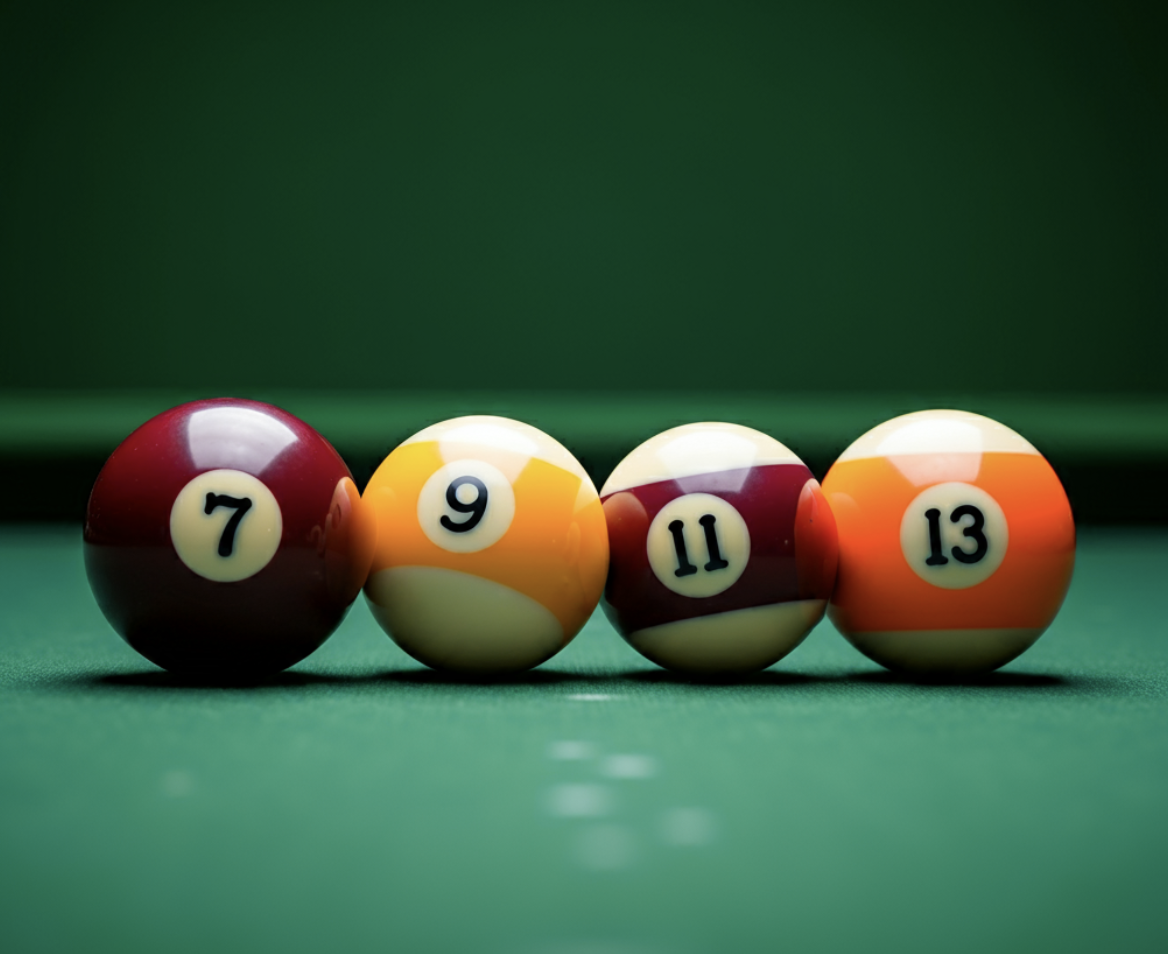

In [47]:
!wget https://storage.googleapis.com/generativeai-downloads/images/pool.png -O pool.png -q

im = Image.open("pool.png")
im

In [57]:
model_name = "gemini-2.0-flash-thinking-exp" # @param ["gemini-1.5-flash-8b","gemini-1.5-flash","gemini-1.5-pro","gemini-2.0-flash-exp", "gemini-2.0-flash-thinking-exp"] {"allow-input":true}

response = client.models.generate_content(
    model=model_name,
    contents=[
        im,
        "How do I use three of these numbers to sum up to 30?"
    ]
)

display(Markdown("## Thoughts"))
display(Markdown(response.candidates[0].content.parts[0].text))
display(Markdown("## Answer"))
display(Markdown(response.candidates[0].content.parts[1].text))

## Thoughts

Here's my thought process for solving this classic riddle:

1. **Understand the Goal:** The objective is to find three numbers from the set {7, 9, 11, 13} that add up to 30.

2. **Initial Approach - Direct Addition:** My first instinct is to try different combinations of three numbers. I might start with the largest numbers:

   * 13 + 11 + 9 = 33 (Too high)
   * 13 + 11 + 7 = 31 (Too high)

3. **Consider Smaller Combinations:**  I might then try combinations with smaller numbers:

   * 9 + 11 + 7 = 27 (Too low)

4. **Notice a Pattern (Odd Numbers):**  I observe that all the given numbers are odd. A key mathematical concept comes to mind:

   * Odd + Odd = Even
   * Even + Odd = Odd

   Therefore, the sum of *three* odd numbers will always be odd. Since 30 is an even number, it's impossible to get 30 by adding three of these *integers* directly.

5. **Look for a Twist/Misdirection:** When a straightforward solution isn't possible, it's common for these types of riddles to involve a trick or a play on words. I start considering if there's anything about the *representation* of the numbers that could be manipulated.

6. **Consider Alternative Interpretations of the Numbers:** Could the numbers be interpreted differently?  Could I change their form somehow?  This is where the idea of flipping or manipulating digits comes in.

7. **Focus on Potential Digit Transformations:** I look at each digit and consider how it might be transformed to another digit that could be part of the solution. The digit '9' is the obvious candidate because it can become a '6' when flipped or rotated.

8. **Test the Transformation:** If I treat one of the '9's as a '6', does it help? Let's try replacing one of the '9's in my earlier attempts:

   * 13 + 11 + 6 = 30  **Success!**

9. **Formalize the Solution:**  Once I've found the combination, I can explain the solution clearly, highlighting the trick involved. This involves stating the three numbers used and explaining how the '9' was transformed into a '6'.

This process involves a combination of direct calculation, mathematical reasoning (parity of numbers), and creative problem-solving to identify the hidden twist in the riddle.

## Answer

This is a classic riddle that plays on how we perceive numbers. You can't get 30 by simply adding three of the numbers 7, 9, 11, and 13 as they are.

Here's the trick:

**Flip the number 9 upside down to make it a 6.**

Then the solution is:

**11 + 13 + 6 = 30**


## Example #4: Generating question for a specific level of knowledge

This time, the questions requires a few types of knowledge, including what is relevant to the Physics C exam. The questions generated are not the interesting part, but the reasoning to come up with them shows they are not just randomly generated.


In [44]:
model_name = "gemini-2.0-flash-thinking-exp" # @param ["gemini-1.5-flash-8b","gemini-1.5-flash","gemini-1.5-pro","gemini-2.0-flash-exp", "gemini-2.0-flash-thinking-exp"] {"allow-input":true}

response = client.models.generate_content(
    model=model_name,
    contents="Give me a practice question I can use for the AP Physics C exam?"
)

display(Markdown("## Thoughts"))
display(Markdown(response.candidates[0].content.parts[0].text))
display(Markdown("## Answer"))
display(Markdown(response.candidates[0].content.parts[1].text))

### Thoughts

Here's a breakdown of the thought process behind creating that AP Physics C practice problem:

1. **Analyze the Request:** The user needs a practice question for the AP Physics C exam. This implies the question should be at the appropriate difficulty level, covering a concept likely to be tested, and be solvable using the principles taught in the course.

2. **Identify Core Concepts:**  AP Physics C covers Mechanics and Electricity & Magnetism. Both are frequently tested. For Mechanics, good topics include:
    * Newton's Laws and Forces
    * Work, Energy, and Power
    * Rotational Motion
    * Simple Harmonic Motion
    * Oscillations and Waves (less common on the mechanics section, more common conceptually)

    For Electricity & Magnetism, good topics include:
    * Electric Fields and Forces
    * Gauss's Law
    * Electric Potential
    * Capacitance
    * Current, Resistance, and Circuits (DC and RC)
    * Magnetic Fields and Forces
    * Ampere's Law
    * Faraday's Law and Induction

3. **Choose a Topic and Difficulty Level:**  For a single practice question, a concept that allows for multiple parts and connects different ideas is good. Mechanics involving energy and forces is a solid choice. Specifically, a system involving springs, friction, and potentially some inclines allows for testing several core principles. The difficulty should be challenging but not overly complex – doable within a reasonable time frame.

4. **Design the Scenario:**  A block on a horizontal surface attached to a spring is a classic setup. Adding friction introduces realism and tests understanding of non-conservative forces. Including a velocity at the start adds a dynamic element.

5. **Develop the Question Parts:**  Structure the question logically, building from simpler to more complex concepts.

    * **(a) Free Body Diagram:** A fundamental skill. Requires identifying and correctly labeling forces.
    * **(b) Spring Constant:** Tests the ability to apply Hooke's Law at equilibrium. This links forces and spring properties.
    * **(c) Work Done by Friction:** Introduces the concept of work done by a non-conservative force. Requires understanding the relationship between force, displacement, and work.
    * **(d) Maximum Compression:**  A core energy conservation problem. Requires setting up an energy balance equation considering initial kinetic energy, spring potential energy, and work done by friction. This is often a key skill tested in AP Physics C.
    * **(e) Return to Equilibrium Speed:** Another energy conservation problem, but now from the compressed state. Tests understanding of how energy transforms during the motion.

6. **Specify Exam-Relevant Information:**  Crucial to making it feel like a real AP question.

    * **Context:** Clearly state which AP Physics C exam (Mechanics).
    * **Concepts Covered:** List the key physics principles involved. This helps the user understand the focus.
    * **Assumptions:** Mention any simplifying assumptions (massless spring, ideal surface except where specified).
    * **Instructions:** Provide clear instructions on showing work and using appropriate units.
    * **Time Suggestion:**  Give a realistic time estimate to encourage practice under exam conditions.

7. **Provide a Detailed Solution:**  The solution is just as important as the question.

    * **Clear Steps:** Show the logical progression of the solution.
    * **Relevant Equations:**  Explicitly state the formulas used.
    * **Algebraic Manipulation:** Demonstrate the steps to solve for the unknowns.
    * **Numerical Answers with Units:**  Provide the final numerical answers with correct units.
    * **Explanation of Reasoning:** Briefly explain *why* each step is taken, reinforcing the underlying physics. This is crucial for learning.

8. **Self-Correction/Refinement:**  Review the question and solution. Are there any ambiguities? Is the difficulty appropriate? Are the steps in the solution clear and easy to follow?  For example, ensuring consistent use of variables and clear notation. Initially, I might have considered a more complex scenario, like an incline, but opted for a horizontal surface to keep the first practice problem focused.

By following this process, the aim is to create a practice question that is representative of the AP Physics C exam, tests key concepts effectively, and provides a valuable learning opportunity for the student.

### Answer

Okay, here's a practice question for the **AP Physics C: Mechanics** exam focusing on **work, energy, and rotational motion**:

**Question:**

A uniform solid disk of mass *M* and radius *R* is initially at rest on a horizontal surface. A light string is wrapped around the rim of the disk. A constant horizontal force of magnitude *F* is applied to the free end of the string, causing the disk to both rotate and translate. The coefficient of kinetic friction between the disk and the surface is μ<sub>k</sub>.

**(a)** On the diagram below, draw and label all the forces acting on the disk.

**(b)** In terms of *M*, *R*, *F*, μ<sub>k</sub>, and fundamental constants, derive an expression for the magnitude of the translational acceleration *a* of the center of mass of the disk.

**(c)** In terms of *M*, *R*, *F*, μ<sub>k</sub>, and fundamental constants, derive an expression for the magnitude of the angular acceleration α of the disk about its center of mass.

**(d)** Determine the work done by the applied force *F* when the center of mass of the disk has moved a distance *d*.

**(e)** Determine the change in rotational kinetic energy of the disk when its center of mass has moved a distance *d*.

**(f)** Using the work-energy theorem, determine the translational speed *v* of the center of mass of the disk after it has moved a distance *d*.

**Diagram:**

```
     _______
    /       \
   |         |  <-- Force F
    \_______/
       o  (center of mass)
       |
       |
    _______ (Surface)
```

**Concepts Covered:**

* Free-body diagrams
* Newton's Second Law for translation and rotation
* Torque
* Moment of inertia of a solid disk
* Work done by a force
* Rotational kinetic energy
* Work-energy theorem

**Tips for Solving:**

* Remember to consider both translational and rotational motion.
* Relate the translational acceleration of the center of mass to the angular acceleration.
* Be careful with signs and directions of forces and torques.
* The moment of inertia of a solid disk about its center of mass is (1/2)MR<sup>2</sup>.

**This question tests a student's ability to:**

* Identify and apply relevant physics principles.
* Draw accurate free-body diagrams.
* Set up and solve systems of equations.
* Apply the work-energy theorem to a system with both translational and rotational motion.

Good luck! Let me know if you'd like the solution after you've tried it.


# Next Steps

Try the [Gemini 2.0 Flash Thinking](https://aistudio.google.com/app/prompts/new_chat?model=gemini-2.0-flash-thinking-exp) model in AI Studio with all your crazy problems and brain teasers.

For more examples of the Gemini 2.0 capabilities, check the [Gemini 2.0 folder of the cookbook](https://github.com/google-gemini/cookbook/blob/main/gemini-2/). You'll learn how to use the [Live API](live_api_starter.ipynb), juggle with [multiple tools](./plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./spatial_understanding.ipynb) abilities.